<a href="https://colab.research.google.com/github/fxs2596/NerdOut/blob/main/PassOrFail%20(RandomForestClassifier).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd

# Step 1: Load dataset (after uploading manually to Colab)
df = pd.read_csv('/content/StudentsPerformance.csv')

# Step 2: Add average score + pass/fail label
df['average'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['pass'] = (df['average'] >= 50).astype(int)

# Step 3: One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=[
    'gender',
    'race/ethnicity',
    'parental level of education',
    'lunch',
    'test preparation course'
], drop_first=True)

# Step 4: Convert boolean values (True/False) to integers (1/0)
df_encoded = df_encoded.astype(int)

# Step 5: Split into features (X) and label (y)
X = df_encoded.drop(columns=['math score', 'reading score', 'writing score', 'average', 'pass'])
y = df_encoded['pass']



In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
y_pred = model.predict(x_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")

Model accuracy: 85.50%


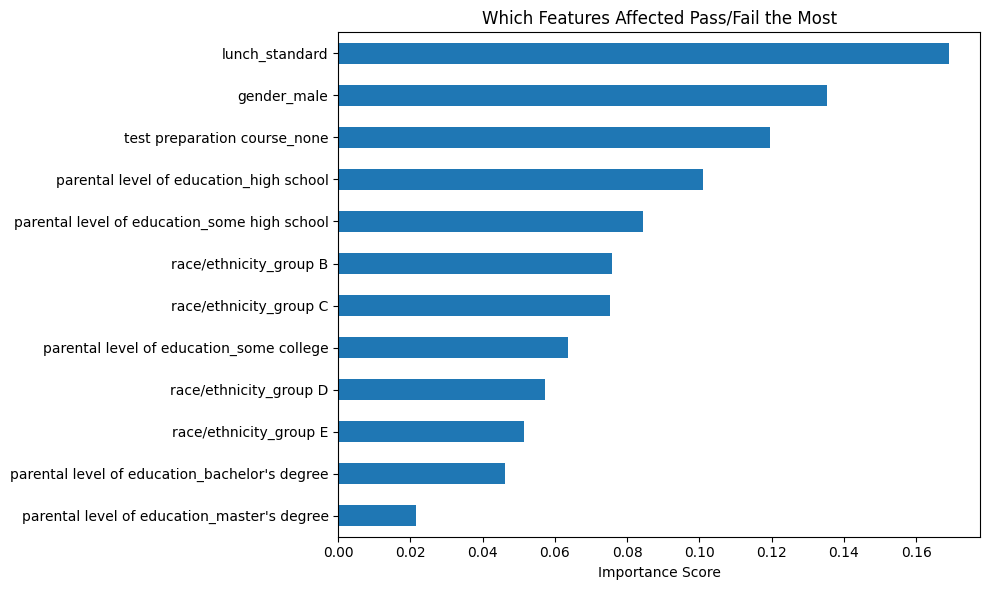

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importance scores from the trained model
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

# Sort and plot them
plt.figure(figsize=(10, 6))
feat_importances.sort_values().plot(kind='barh')
plt.title("Which Features Affected Pass/Fail the Most")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()
